In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import spacy
from heapq import nlargest

In [67]:
df = pd.read_csv('space_launches_articles.csv')
df.head()

,Unnamed: 0,title,url,date,description,body
0,0,"SpaceX launches more Starlink satellites, beta...",https://spaceflightnow.com/2020/09/03/spacex-l...,"September 3, 2020",Sixty more satellites launched Thursday from t...,Sixty more satellites launched Thursday from t...
1,1,Vega rocket deploys 53 satellites on successfu...,https://spaceflightnow.com/2020/09/03/vega-roc...,"September 3, 2020","Delayed a year by a launch failure, the corona...","Delayed a year by a launch failure, the corona..."
2,2,Live coverage: SpaceX launches another 60 Star...,https://spaceflightnow.com/2020/09/03/falcon-9...,"September 3, 2020",SpaceX completed another another launch to add...,Live coverage of the countdown and launch of a...
3,3,SLS booster test-fired in Utah,https://spaceflightnow.com/2020/09/02/sls-fsb-...,"September 2, 2020",Northrop Grumman test-fired a five-segment sol...,Northrop Grumman test-fired a five-segment sol...
4,4,Live coverage: Vega rocket launches with 53 sm...,https://spaceflightnow.com/2020/09/02/vega-vv1...,"September 2, 2020",Arianespace launched a solid-fueled Vega rocke...,Live coverage of the countdown and launch of a...


In [68]:
df.shape

(3890, 6)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3890 non-null   int64 
 1   title        3890 non-null   object
 2   url          3890 non-null   object
 3   date         3890 non-null   object
 4   description  3890 non-null   object
 5   body         3884 non-null   object
dtypes: int64(1), object(5)
memory usage: 182.5+ KB


In [70]:
df.isnull().sum()

Unnamed: 0     0
title          0
url            0
date           0
description    0
body           6
dtype: int64

In [71]:
df.dropna(subset = ['body'], inplace = True)

In [72]:
df.shape

(3884, 6)

In [73]:
df.apply(pd.isnull).sum()

Unnamed: 0     0
title          0
url            0
date           0
description    0
body           0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [76]:
df.head()

,title,url,date,description,body
0,"SpaceX launches more Starlink satellites, beta...",https://spaceflightnow.com/2020/09/03/spacex-l...,"September 3, 2020",Sixty more satellites launched Thursday from t...,Sixty more satellites launched Thursday from t...
1,Vega rocket deploys 53 satellites on successfu...,https://spaceflightnow.com/2020/09/03/vega-roc...,"September 3, 2020","Delayed a year by a launch failure, the corona...","Delayed a year by a launch failure, the corona..."
2,Live coverage: SpaceX launches another 60 Star...,https://spaceflightnow.com/2020/09/03/falcon-9...,"September 3, 2020",SpaceX completed another another launch to add...,Live coverage of the countdown and launch of a...
3,SLS booster test-fired in Utah,https://spaceflightnow.com/2020/09/02/sls-fsb-...,"September 2, 2020",Northrop Grumman test-fired a five-segment sol...,Northrop Grumman test-fired a five-segment sol...
4,Live coverage: Vega rocket launches with 53 sm...,https://spaceflightnow.com/2020/09/02/vega-vv1...,"September 2, 2020",Arianespace launched a solid-fueled Vega rocke...,Live coverage of the countdown and launch of a...


In [77]:
df['body'][0]

'Sixty more satellites launched Thursday from the Kennedy Space Center to join SpaceX’s Starlink fleet, adding coverage to the broadband network as it is already “well into the first phase of testing.”\nThe next 60 Starlink relay nodes blasted off at 8:46:14 a.m. EDT (1246:14 GMT) Thursday on top of a Falcon 9 rocket, riding SpaceX’s workhorse launcher into an orbit more between about 130 miles and 210 miles (210 and 340 kilometers) above Earth.\nNine main engines powered the Falcon 9 off pad 39A at the Florida spaceport, then vectored their thrust to steer the rocket toward the northeast to line up with an orbital plane in the Starlink satellite fleet.\nAfter finishing its job on Thursday’s launch, the Falcon 9’s reusable first stage booster landed on SpaceX’s drone ship “Of Course I Still Love You” holding position in the Atlantic Ocean a couple hundred miles east of Charleston, South Carolina.\nThe propulsive pinpoint landing marked the 60th time SpaceX has recovered a Falcon 9 boos

In [78]:
df['body'][1]

'Delayed a year by a launch failure, the coronavirus pandemic and a stretch of stiff upper level winds this summer, an Italian-made Vega rocket vaulted into orbit from French Guiana on Wednesday night and deployed 53 small satellites from 13 countries to punctuate a flawless return to flight mission.\nThe rideshare launch set a record for the most satellites ever flown on a European rocket, and helped validate process changes introduced to resolve the problem on the Vega’s second stage that caused a failure on the launcher’s previous mission.\nThe 98-foot-tall (30-meter) rocket lit its solid-fueled first stage at 9:51:10 p.m. EDT Wednesday (0151:10 GMT Thursday), immediately boosting the Vega launcher away from the European-run Guiana Space Center on the northern coast of South America with nearly 700,000 pounds of thrust.\nHeading north into a clear late night sky, the Vega rocket flew downrange over the Atlantic Ocean and shed its first stage around two minutes after liftoff.\nThe Ve

In [79]:
df['body'][100]

'A solid-fueled Northrop Grumman Minotaur 4 rocket vaulted into orbit Wednesday from Virginia’s Eastern Shore and deployed four top secret spacecraft for the U.S. government’s spy satellite agency, extending the program’s success record ahead of three more Minotaur missions planned in 2021.\nThe 78-foot-tall (23.8-meter) launcher fired away from pad 0B at the Mid-Atlantic Regional Spaceport in Virginia at 9:46 a.m. EDT (1346 GMT) Wednesday after a 46-minute delay to wait for fishing boats to clear a hazard area near the launch site.\nRiding a half-million pounds of thrust, the Minotaur 4 darted into a mostly sunny sky at breathtaking speed and broke the sound barrier just 17 seconds after liftoff.\nThree solid-fueled rocket motors stockpiled from the U.S. Air Force’s retired Peacekeeper nuclear missile program powered the Minotaur 4 rocket into space. A commercial Orion 38 fourth stage motor then fired to inject the four National Reconnaissance Office payloads into orbit a few hundred 

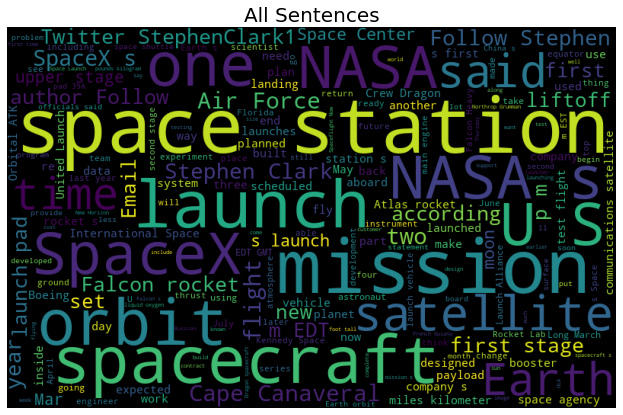

In [80]:
plt.figure(figsize = (13, 7))
all_sen = ' '.join([sentence for sentence in df['body']])
word_cloud = WordCloud(width = 800, height = 500, max_font_size = 100, random_state = 101).generate(all_sen)
plt.imshow(word_cloud)
plt.title('All Sentences', fontsize = 20)
plt.axis('off')
plt.show()

In [81]:
sw = stopwords.words('english')

In [82]:
lemmatizer = WordNetLemmatizer()

In [83]:
nlp = spacy.load('en_core_web_sm')

In [84]:
def article_summarization(text, n_sentence):
    doc = nlp(text)
    text = text.lower()
    text = re.sub('[^a-z.]', ' ', text)
    text = re.sub('\s+[a-z]\s+', ' ', text)
    text = re.sub('\s+', ' ', text)
    words = [word for word in text.split() if word not in sw]
    words = [lemmatizer.lemmatize(word) for word in words]
    word_freq = Counter(words)
    max_freq = max(word_freq.values())
    for word, freq in word_freq.items():
        word_freq[word] = word_freq[word] / max_freq
    sentences = [sentence.text for sentence in doc.sents]
    sent_freq = dict()
    for sentence in sentences:
        for token in sentence.split():
            if token in word_freq.keys():
                if sentence not in sent_freq.keys():
                    sent_freq[sentence] = word_freq[token]
                else:
                    sent_freq[sentence] += word_freq[word]
    n = nlargest(n_sentence, sent_freq, key = sent_freq.get)
    or_sents = []
    for i in sentences:
        for j in n:
            if i == j:
                or_sents.append(i)
    return ' '.join(or_sents)

In [85]:
df['summarized_article'] = df['body'].apply(lambda x: article_summarization(x, n_sentence = 3))

In [86]:
df.head()

,title,url,date,description,body,summarized_article
0,"SpaceX launches more Starlink satellites, beta...",https://spaceflightnow.com/2020/09/03/spacex-l...,"September 3, 2020",Sixty more satellites launched Thursday from t...,Sixty more satellites launched Thursday from t...,Each flat-panel Starlink satellite weighs abou...
1,Vega rocket deploys 53 satellites on successfu...,https://spaceflightnow.com/2020/09/03/vega-roc...,"September 3, 2020","Delayed a year by a launch failure, the corona...","Delayed a year by a launch failure, the corona...",The 98-foot-tall (30-meter) rocket lit its sol...
2,Live coverage: SpaceX launches another 60 Star...,https://spaceflightnow.com/2020/09/03/falcon-9...,"September 3, 2020",SpaceX completed another another launch to add...,Live coverage of the countdown and launch of a...,Live coverage of the countdown and launch of a...
3,SLS booster test-fired in Utah,https://spaceflightnow.com/2020/09/02/sls-fsb-...,"September 2, 2020",Northrop Grumman test-fired a five-segment sol...,Northrop Grumman test-fired a five-segment sol...,"The Flight Support Booster, or FSB-1, test wil..."
4,Live coverage: Vega rocket launches with 53 sm...,https://spaceflightnow.com/2020/09/02/vega-vv1...,"September 2, 2020",Arianespace launched a solid-fueled Vega rocke...,Live coverage of the countdown and launch of a...,Live coverage of the countdown and launch of a...


In [88]:
df['body'][0]

'Sixty more satellites launched Thursday from the Kennedy Space Center to join SpaceX’s Starlink fleet, adding coverage to the broadband network as it is already “well into the first phase of testing.”\nThe next 60 Starlink relay nodes blasted off at 8:46:14 a.m. EDT (1246:14 GMT) Thursday on top of a Falcon 9 rocket, riding SpaceX’s workhorse launcher into an orbit more between about 130 miles and 210 miles (210 and 340 kilometers) above Earth.\nNine main engines powered the Falcon 9 off pad 39A at the Florida spaceport, then vectored their thrust to steer the rocket toward the northeast to line up with an orbital plane in the Starlink satellite fleet.\nAfter finishing its job on Thursday’s launch, the Falcon 9’s reusable first stage booster landed on SpaceX’s drone ship “Of Course I Still Love You” holding position in the Atlantic Ocean a couple hundred miles east of Charleston, South Carolina.\nThe propulsive pinpoint landing marked the 60th time SpaceX has recovered a Falcon 9 boos

In [89]:
df['summarized_article'][0]

'Each flat-panel Starlink satellite weighs about a quarter-ton, and they are built at a SpaceX facility in Redmond, Washington, near Seattle. Hofeller said last month that SpaceX is building six Starlink spacecraft per day, and plans to launch Starlink missions at intervals of every two to three weeks until completing the initial Starlink network of around 1,440 satellites.\n Those efforts had some success, astronomers said last month they expect future Starlink satellites will be dim enough to avoid impacts on amateur astronomy and dark sky enthusiasts.\n'

In [90]:
df['body'][1]

'Delayed a year by a launch failure, the coronavirus pandemic and a stretch of stiff upper level winds this summer, an Italian-made Vega rocket vaulted into orbit from French Guiana on Wednesday night and deployed 53 small satellites from 13 countries to punctuate a flawless return to flight mission.\nThe rideshare launch set a record for the most satellites ever flown on a European rocket, and helped validate process changes introduced to resolve the problem on the Vega’s second stage that caused a failure on the launcher’s previous mission.\nThe 98-foot-tall (30-meter) rocket lit its solid-fueled first stage at 9:51:10 p.m. EDT Wednesday (0151:10 GMT Thursday), immediately boosting the Vega launcher away from the European-run Guiana Space Center on the northern coast of South America with nearly 700,000 pounds of thrust.\nHeading north into a clear late night sky, the Vega rocket flew downrange over the Atlantic Ocean and shed its first stage around two minutes after liftoff.\nThe Ve

In [91]:
df['summarized_article'][1]

'The 98-foot-tall (30-meter) rocket lit its solid-fueled first stage at 9:51:10 p.m. EDT Wednesday (0151:10 GMT Thursday), immediately boosting the Vega launcher away from the European-run Guiana Space Center on the northern coast of South America with nearly 700,000 pounds of thrust.\n Watch replays of tonight’s Vega launch showing rocket darting into the night sky over French Guiana with nearly 700,000 pounds of thrust.\n Headquartered in Buenos Aires with a satellite manufacturing facility in Montevideo, Uruguay, Satellogic\xa0is building a fleet of satellites to cover the globe with visible, hyperspectral and infrared imagery.'